In [29]:
import numpy as np
from skimage import io, exposure, util, morphology
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import cellpose
from cellpose import models
from cellpose import io as cp_io
from cellpose import plot as cp_plot

# default colormap, figure size, and font size
plt.rcParams['image.cmap']='gray'
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['font.size'] = 18

In [31]:
def make8bit(img):
    """Convert an image to 8-bit by scaling its values in the 1st-99th percentile to the range 0,255"""
    img_8bit = img
    for cc in range(img.shape[2]):
        Imin, Imax = np.percentile(img[:,:,cc],(1, 99))
        img_8bit[:,:,cc] = exposure.rescale_intensity(img[:,:,cc],in_range=(Imin, Imax), out_range=(0,255))
    return img_8bit

In [17]:
img = io.imread('data/Example.tif',plugin='tifffile')
img = np.moveaxis(img,[0,1,2,3],[0,2,3,1])
img.shape

(3, 3, 1024, 1024)

In [18]:
img1 = img[0]
# plt.imshow(img1,vmax = 1e3);
# plt.axis('off');

In [38]:
model = cellpose.models.Cellpose(gpu=False, model_type='nuclei')

In [41]:
chan = [2,0]
masks, flows, styles, diams = model.eval(img1,channels=chan)

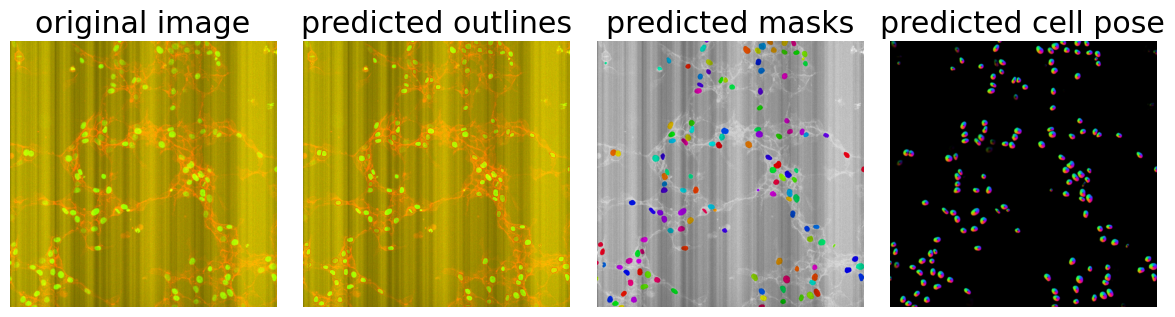

In [42]:
fig = plt.figure(figsize=(12,5))
cp_plot.show_segmentation(fig,make8bit(img1),masks,flows[0],channels=chan)
plt.tight_layout()
plt.show()

In [22]:
img.shape

(3, 3, 1024, 1024)

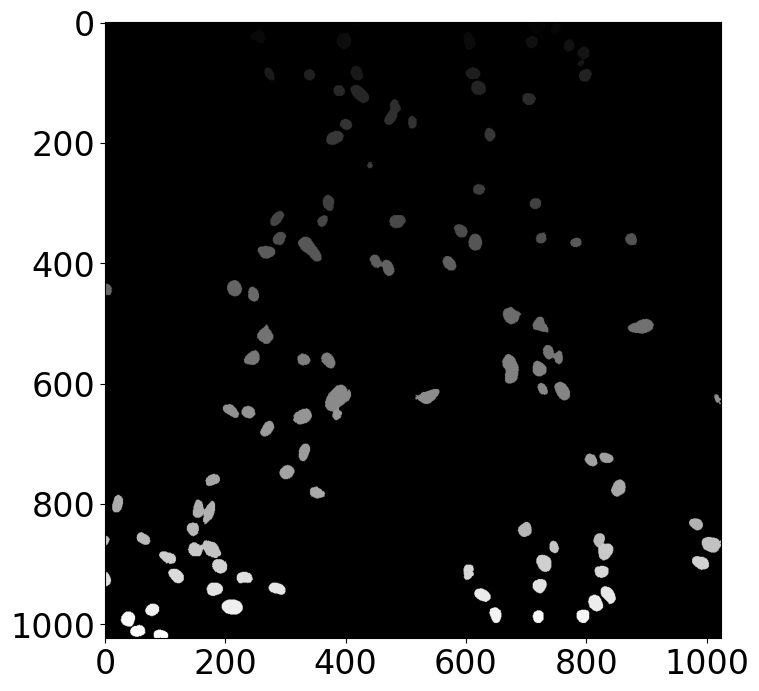

In [40]:
masks.shape
plt.imshow(masks[2])